In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
df=pd.read_csv('heart.csv')

In [3]:
df=shuffle(df)

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3,0
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


In [5]:
for i in df.index:
    if (df.loc[i].isnull().sum() != 0):
        print('Missing value at ', i)
print('Done!')

Done!


In [6]:
df_features=df.drop('target',axis=1)

In [7]:
df_target=df['target']

In [8]:
X_train_all,X_test_all,y_train_all,y_test_all = train_test_split(df_features,df_target,test_size=0.20,random_state=42)

In [9]:
X_train_all.shape

(242, 13)

In [10]:
X_test_all.shape

(61, 13)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(500, activation=tf.nn.relu, input_shape=[len(X_train_all.keys())]),
    keras.layers.Dense(400, activation=tf.nn.relu),
    keras.layers.Dense(300, activation=tf.nn.relu),
    keras.layers.Dense(200, activation=tf.nn.relu),
    keras.layers.Dense(100, activation=tf.nn.relu),
    keras.layers.Dense(50, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.relu),
    keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

W0617 13:30:19.691211 140270556890944 deprecation.py:506] From /home/alton/tensorflow/tf/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1

In [13]:
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1

In [15]:
model1=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 1s 3ms/sample - loss: 2.2709 - acc: 0.5000
Epoch 2/10
242/242 [==============================] - 0s 138us/sample - loss: 0.3730 - acc: 0.4917
Epoch 3/10
242/242 [==============================] - 0s 102us/sample - loss: 0.2748 - acc: 0.4917
Epoch 4/10
242/242 [==============================] - 0s 130us/sample - loss: 0.2530 - acc: 0.5041
Epoch 5/10
242/242 [==============================] - 0s 131us/sample - loss: 0.2417 - acc: 0.5909
Epoch 6/10
242/242 [==============================] - 0s 121us/sample - loss: 0.2413 - acc: 0.5661
Epoch 7/10
242/242 [==============================] - 0s 119us/sample - loss: 0.2454 - acc: 0.6033
Epoch 8/10
242/242 [==============================] - 0s 152us/sample - loss: 0.2579 - acc: 0.5455
Epoch 9/10
242/242 [==============================] - 0s 140us/sample - loss: 0.2736 - acc: 0.4917
Epoch 10/10
242/242 [==============================] - 0s 90us/sample - loss: 0.2489 - acc: 0.5413


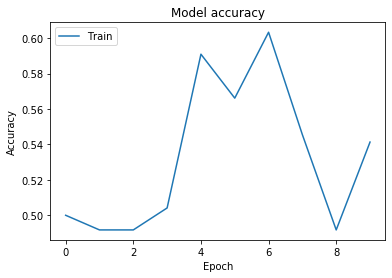

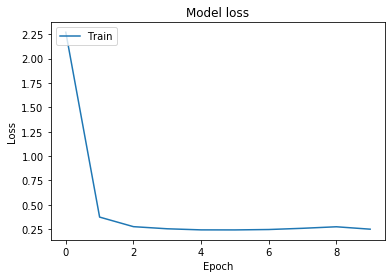

In [16]:
import matplotlib.pyplot as plt
plt.plot(model1.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model1.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
model2=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 135us/sample - loss: 0.2178 - acc: 0.6281
Epoch 2/10
242/242 [==============================] - 0s 121us/sample - loss: 0.2330 - acc: 0.5950
Epoch 3/10
242/242 [==============================] - 0s 119us/sample - loss: 0.5084 - acc: 0.5083
Epoch 4/10
242/242 [==============================] - 0s 117us/sample - loss: 0.2701 - acc: 0.5041
Epoch 5/10
242/242 [==============================] - 0s 136us/sample - loss: 0.2300 - acc: 0.6033
Epoch 6/10
242/242 [==============================] - 0s 111us/sample - loss: 0.2239 - acc: 0.6198
Epoch 7/10
242/242 [==============================] - 0s 105us/sample - loss: 0.2371 - acc: 0.6240
Epoch 8/10
242/242 [==============================] - 0s 132us/sample - loss: 0.2057 - acc: 0.6653
Epoch 9/10
242/242 [==============================] - 0s 294us/sample - loss: 0.2477 - acc: 0.5992
Epoch 10/10
242/242 [==============================] - 0s 101us/sample - loss: 0.2230 - acc: 0.6322


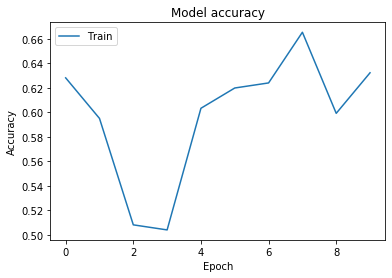

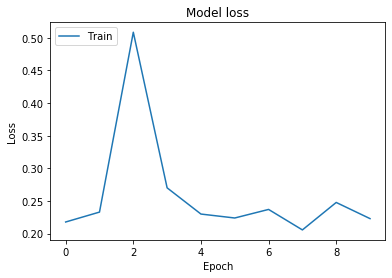

In [18]:
plt.plot(model2.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model2.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
model3=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 158us/sample - loss: 0.2312 - acc: 0.6240
Epoch 2/10
242/242 [==============================] - 0s 142us/sample - loss: 0.2318 - acc: 0.6405
Epoch 3/10
242/242 [==============================] - 0s 121us/sample - loss: 0.1996 - acc: 0.6983
Epoch 4/10
242/242 [==============================] - 0s 107us/sample - loss: 0.2642 - acc: 0.5992
Epoch 5/10
242/242 [==============================] - 0s 90us/sample - loss: 0.2739 - acc: 0.5744
Epoch 6/10
242/242 [==============================] - 0s 89us/sample - loss: 0.1942 - acc: 0.7066
Epoch 7/10
242/242 [==============================] - 0s 106us/sample - loss: 0.2138 - acc: 0.6612
Epoch 8/10
242/242 [==============================] - 0s 101us/sample - loss: 0.2905 - acc: 0.5620
Epoch 9/10
242/242 [==============================] - 0s 128us/sample - loss: 0.2013 - acc: 0.7231
Epoch 10/10
242/242 [==============================] - 0s 117us/sample - loss: 0.2708 - acc: 0.5661


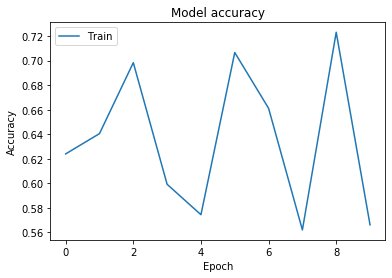

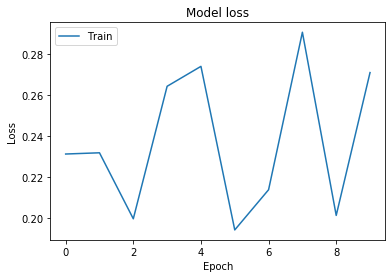

In [20]:
plt.plot(model3.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model3.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               7000      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1

In [22]:
model4=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 98us/sample - loss: 0.2455 - acc: 0.6198
Epoch 2/10
242/242 [==============================] - 0s 90us/sample - loss: 0.2225 - acc: 0.6240
Epoch 3/10
242/242 [==============================] - 0s 95us/sample - loss: 0.2006 - acc: 0.6612
Epoch 4/10
242/242 [==============================] - 0s 92us/sample - loss: 0.1847 - acc: 0.7149
Epoch 5/10
242/242 [==============================] - 0s 94us/sample - loss: 0.2444 - acc: 0.5785
Epoch 6/10
242/242 [==============================] - 0s 88us/sample - loss: 0.2113 - acc: 0.6736
Epoch 7/10
242/242 [==============================] - 0s 84us/sample - loss: 0.2195 - acc: 0.6446
Epoch 8/10
242/242 [==============================] - 0s 105us/sample - loss: 0.1975 - acc: 0.7066
Epoch 9/10
242/242 [==============================] - 0s 111us/sample - loss: 0.2428 - acc: 0.6157
Epoch 10/10
242/242 [==============================] - 0s 121us/sample - loss: 0.2048 - acc: 0.6942


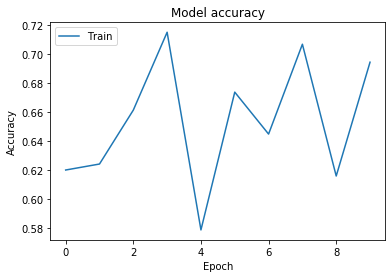

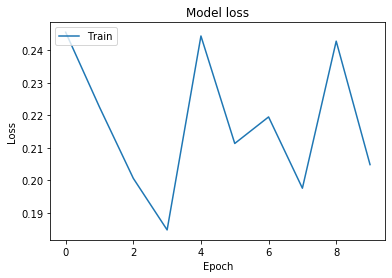

In [23]:
plt.plot(model4.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model4.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
model5=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 90us/sample - loss: 0.1937 - acc: 0.6860
Epoch 2/10
242/242 [==============================] - 0s 91us/sample - loss: 0.2741 - acc: 0.5702
Epoch 3/10
242/242 [==============================] - 0s 98us/sample - loss: 0.2121 - acc: 0.6736
Epoch 4/10
242/242 [==============================] - 0s 118us/sample - loss: 0.2087 - acc: 0.6364
Epoch 5/10
242/242 [==============================] - 0s 278us/sample - loss: 0.1969 - acc: 0.6694
Epoch 6/10
242/242 [==============================] - 0s 124us/sample - loss: 0.1902 - acc: 0.7231
Epoch 7/10
242/242 [==============================] - 0s 118us/sample - loss: 0.2044 - acc: 0.6736
Epoch 8/10
242/242 [==============================] - 0s 156us/sample - loss: 0.1870 - acc: 0.7355
Epoch 9/10
242/242 [==============================] - 0s 98us/sample - loss: 0.2580 - acc: 0.5496
Epoch 10/10
242/242 [==============================] - 0s 115us/sample - loss: 0.1776 - acc: 0.7273


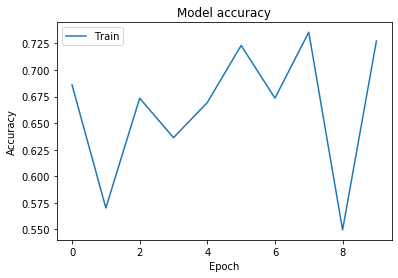

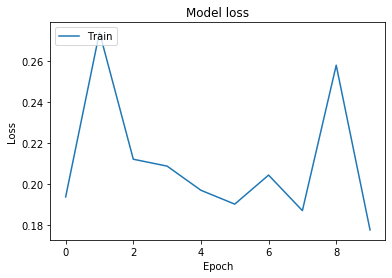

In [25]:
plt.plot(model5.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model5.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [26]:
model6=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 96us/sample - loss: 0.2194 - acc: 0.6736
Epoch 2/10
242/242 [==============================] - 0s 140us/sample - loss: 0.2073 - acc: 0.6694
Epoch 3/10
242/242 [==============================] - 0s 113us/sample - loss: 0.1798 - acc: 0.7107
Epoch 4/10
242/242 [==============================] - 0s 127us/sample - loss: 0.1941 - acc: 0.7107
Epoch 5/10
242/242 [==============================] - 0s 266us/sample - loss: 0.1981 - acc: 0.6860
Epoch 6/10
242/242 [==============================] - 0s 101us/sample - loss: 0.1967 - acc: 0.7025
Epoch 7/10
242/242 [==============================] - 0s 91us/sample - loss: 0.1816 - acc: 0.7066
Epoch 8/10
242/242 [==============================] - 0s 94us/sample - loss: 0.1880 - acc: 0.7190
Epoch 9/10
242/242 [==============================] - 0s 107us/sample - loss: 0.1973 - acc: 0.7066
Epoch 10/10
242/242 [==============================] - 0s 130us/sample - loss: 0.1768 - acc: 0.7107


In [27]:
model7=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)


Epoch 1/10
242/242 [==============================] - 0s 126us/sample - loss: 0.2000 - acc: 0.6777
Epoch 2/10
242/242 [==============================] - 0s 110us/sample - loss: 0.1863 - acc: 0.7025
Epoch 3/10
242/242 [==============================] - 0s 119us/sample - loss: 0.1669 - acc: 0.7397
Epoch 4/10
242/242 [==============================] - 0s 146us/sample - loss: 0.2294 - acc: 0.6860
Epoch 5/10
242/242 [==============================] - 0s 101us/sample - loss: 0.1825 - acc: 0.7314
Epoch 6/10
242/242 [==============================] - 0s 110us/sample - loss: 0.1749 - acc: 0.7190
Epoch 7/10
242/242 [==============================] - 0s 101us/sample - loss: 0.1807 - acc: 0.7231
Epoch 8/10
242/242 [==============================] - 0s 128us/sample - loss: 0.1668 - acc: 0.7769
Epoch 9/10
242/242 [==============================] - 0s 109us/sample - loss: 0.2361 - acc: 0.6405
Epoch 10/10
242/242 [==============================] - 0s 108us/sample - loss: 0.1757 - acc: 0.7355


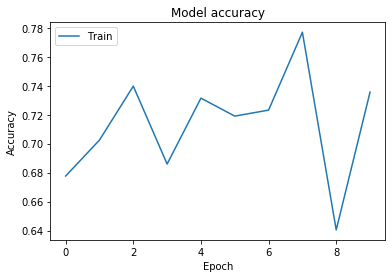

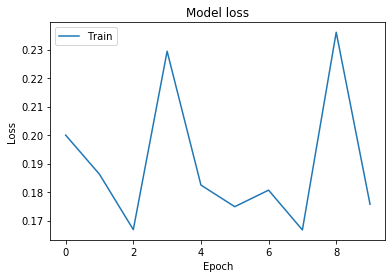

In [28]:
plt.plot(model7.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model7.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [29]:
model8=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)

Epoch 1/10
242/242 [==============================] - 0s 111us/sample - loss: 0.1657 - acc: 0.7479
Epoch 2/10
242/242 [==============================] - 0s 89us/sample - loss: 0.1624 - acc: 0.8099
Epoch 3/10
242/242 [==============================] - 0s 120us/sample - loss: 0.1776 - acc: 0.7355
Epoch 4/10
242/242 [==============================] - 0s 176us/sample - loss: 0.1852 - acc: 0.7149
Epoch 5/10
242/242 [==============================] - 0s 129us/sample - loss: 0.1994 - acc: 0.6942
Epoch 6/10
242/242 [==============================] - 0s 100us/sample - loss: 0.1743 - acc: 0.7397
Epoch 7/10
242/242 [==============================] - 0s 100us/sample - loss: 0.1813 - acc: 0.7190
Epoch 8/10
242/242 [==============================] - 0s 113us/sample - loss: 0.1974 - acc: 0.7066
Epoch 9/10
242/242 [==============================] - 0s 126us/sample - loss: 0.1625 - acc: 0.7562
Epoch 10/10
242/242 [==============================] - 0s 121us/sample - loss: 0.1811 - acc: 0.7149


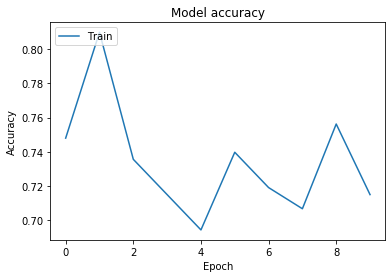

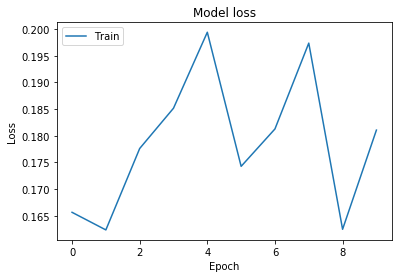

In [30]:
plt.plot(model8.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model8.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 88us/sample - loss: 0.1619 - acc: 0.7562
Epoch 2/10
242/242 [==============================] - 0s 84us/sample - loss: 0.1918 - acc: 0.7190
Epoch 3/10
242/242 [==============================] - 0s 112us/sample - loss: 0.1841 - acc: 0.7066
Epoch 4/10
242/242 [==============================] - 0s 102us/sample - loss: 0.1750 - acc: 0.7727
Epoch 5/10
242/242 [==============================] - 0s 98us/sample - loss: 0.1642 - acc: 0.7603
Epoch 6/10
242/242 [==============================] - 0s 113us/sample - loss: 0.1697 - acc: 0.7521
Epoch 7/10
242/242 [==============================] - 0s 105us/sample - loss: 0.1694 - acc: 0.7562
Epoch 8/10
242/242 [==============================] - 0s 131us/sample - loss: 0.1498 - acc: 0.7893
Epoch 9/10
242/242 [==============================] - 0s 101us/sample - loss: 0.2034 - acc: 0.6942
Epoch 10/10
242/242 [==============================] - 0s 90us/sample - loss: 0.1615 - acc: 0.7686


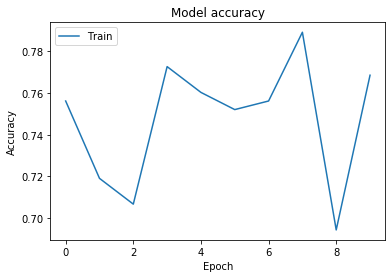

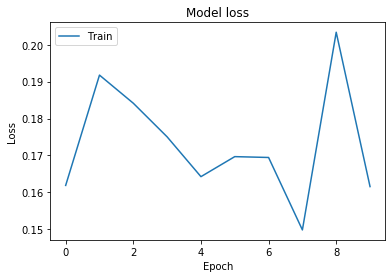

In [31]:
model9=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model9.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model9.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 108us/sample - loss: 0.1543 - acc: 0.7851
Epoch 2/10
242/242 [==============================] - 0s 95us/sample - loss: 0.1910 - acc: 0.6942
Epoch 3/10
242/242 [==============================] - 0s 99us/sample - loss: 0.1506 - acc: 0.7603
Epoch 4/10
242/242 [==============================] - 0s 91us/sample - loss: 0.1901 - acc: 0.7314
Epoch 5/10
242/242 [==============================] - 0s 89us/sample - loss: 0.1600 - acc: 0.7645
Epoch 6/10
242/242 [==============================] - 0s 91us/sample - loss: 0.1636 - acc: 0.7438
Epoch 7/10
242/242 [==============================] - 0s 89us/sample - loss: 0.1752 - acc: 0.7314
Epoch 8/10
242/242 [==============================] - 0s 84us/sample - loss: 0.1742 - acc: 0.7149
Epoch 9/10
242/242 [==============================] - 0s 86us/sample - loss: 0.1426 - acc: 0.7893
Epoch 10/10
242/242 [==============================] - 0s 87us/sample - loss: 0.2054 - acc: 0.7149


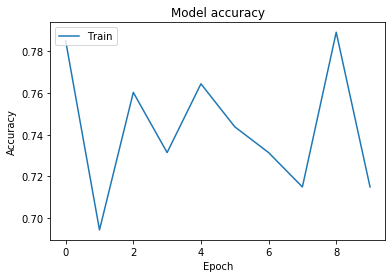

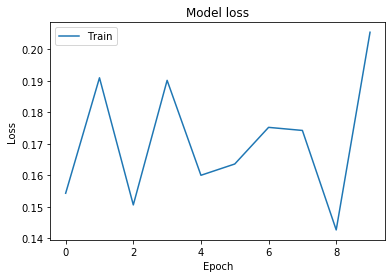

In [32]:
model10=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model10.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model10.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 121us/sample - loss: 0.1514 - acc: 0.7810
Epoch 2/10
242/242 [==============================] - 0s 99us/sample - loss: 0.1557 - acc: 0.7810
Epoch 3/10
242/242 [==============================] - 0s 85us/sample - loss: 0.1813 - acc: 0.7479
Epoch 4/10
242/242 [==============================] - 0s 95us/sample - loss: 0.1384 - acc: 0.7893
Epoch 5/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1669 - acc: 0.7603
Epoch 6/10
242/242 [==============================] - 0s 116us/sample - loss: 0.1341 - acc: 0.8223
Epoch 7/10
242/242 [==============================] - 0s 132us/sample - loss: 0.1684 - acc: 0.7397
Epoch 8/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1632 - acc: 0.7521
Epoch 9/10
242/242 [==============================] - 0s 148us/sample - loss: 0.1345 - acc: 0.8058
Epoch 10/10
242/242 [==============================] - 0s 109us/sample - loss: 0.2142 - acc: 0.6860


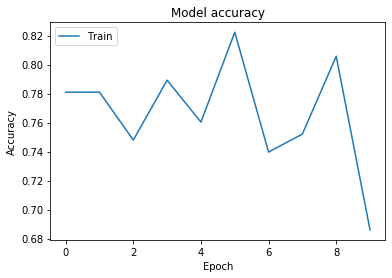

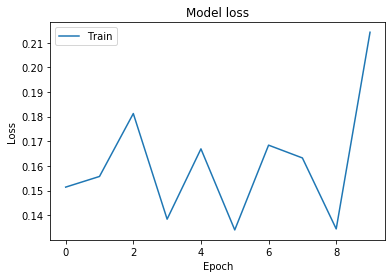

In [33]:
model11=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model11.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model11.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 83us/sample - loss: 0.1342 - acc: 0.7975
Epoch 2/10
242/242 [==============================] - 0s 85us/sample - loss: 0.1443 - acc: 0.8017
Epoch 3/10
242/242 [==============================] - 0s 92us/sample - loss: 0.1539 - acc: 0.7603
Epoch 4/10
242/242 [==============================] - 0s 90us/sample - loss: 0.1546 - acc: 0.7603
Epoch 5/10
242/242 [==============================] - 0s 108us/sample - loss: 0.1973 - acc: 0.7025
Epoch 6/10
242/242 [==============================] - 0s 96us/sample - loss: 0.1276 - acc: 0.8264
Epoch 7/10
242/242 [==============================] - 0s 103us/sample - loss: 0.1586 - acc: 0.7686
Epoch 8/10
242/242 [==============================] - 0s 109us/sample - loss: 0.1425 - acc: 0.8058
Epoch 9/10
242/242 [==============================] - 0s 101us/sample - loss: 0.1830 - acc: 0.7107
Epoch 10/10
242/242 [==============================] - 0s 119us/sample - loss: 0.1327 - acc: 0.8223


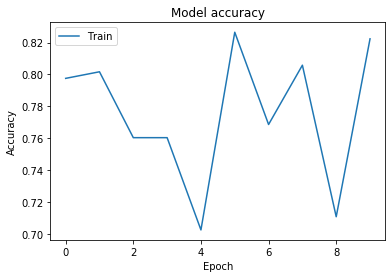

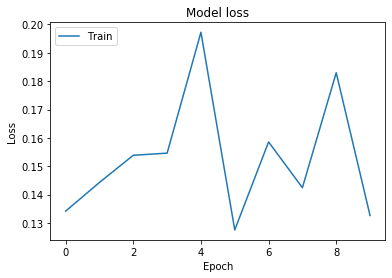

In [34]:
model12=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model12.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model12.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 97us/sample - loss: 0.1247 - acc: 0.8347
Epoch 2/10
242/242 [==============================] - 0s 118us/sample - loss: 0.1608 - acc: 0.7521
Epoch 3/10
242/242 [==============================] - 0s 123us/sample - loss: 0.1398 - acc: 0.8140
Epoch 4/10
242/242 [==============================] - 0s 134us/sample - loss: 0.1612 - acc: 0.7727
Epoch 5/10
242/242 [==============================] - 0s 164us/sample - loss: 0.1476 - acc: 0.7810
Epoch 6/10
242/242 [==============================] - 0s 131us/sample - loss: 0.1280 - acc: 0.8223
Epoch 7/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1270 - acc: 0.8182
Epoch 8/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1720 - acc: 0.7562
Epoch 9/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1526 - acc: 0.7727
Epoch 10/10
242/242 [==============================] - 0s 115us/sample - loss: 0.1589 - acc: 0.7562


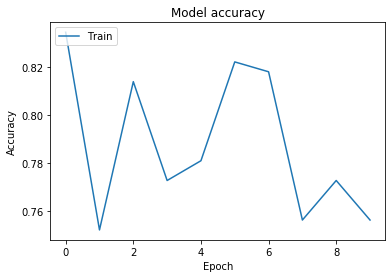

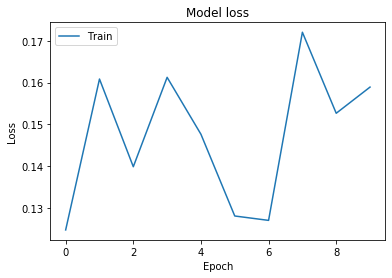

In [35]:
model13=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model13.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model13.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 89us/sample - loss: 0.1225 - acc: 0.8430
Epoch 2/10
242/242 [==============================] - 0s 103us/sample - loss: 0.1539 - acc: 0.7934
Epoch 3/10
242/242 [==============================] - 0s 103us/sample - loss: 0.1604 - acc: 0.7479
Epoch 4/10
242/242 [==============================] - 0s 103us/sample - loss: 0.1373 - acc: 0.8306
Epoch 5/10
242/242 [==============================] - 0s 85us/sample - loss: 0.1489 - acc: 0.8017
Epoch 6/10
242/242 [==============================] - 0s 113us/sample - loss: 0.1415 - acc: 0.7893
Epoch 7/10
242/242 [==============================] - 0s 107us/sample - loss: 0.1308 - acc: 0.8140
Epoch 8/10
242/242 [==============================] - 0s 97us/sample - loss: 0.1202 - acc: 0.8347
Epoch 9/10
242/242 [==============================] - 0s 95us/sample - loss: 0.1502 - acc: 0.8058
Epoch 10/10
242/242 [==============================] - 0s 101us/sample - loss: 0.1452 - acc: 0.8099


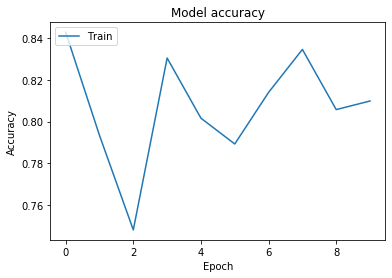

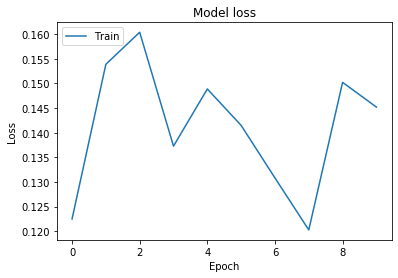

In [36]:
model14=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model14.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model14.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 116us/sample - loss: 0.1429 - acc: 0.8058
Epoch 2/10
242/242 [==============================] - 0s 95us/sample - loss: 0.1443 - acc: 0.7934
Epoch 3/10
242/242 [==============================] - 0s 108us/sample - loss: 0.1420 - acc: 0.8017
Epoch 4/10
242/242 [==============================] - 0s 102us/sample - loss: 0.1407 - acc: 0.8058
Epoch 5/10
242/242 [==============================] - 0s 110us/sample - loss: 0.1462 - acc: 0.7851
Epoch 6/10
242/242 [==============================] - 0s 120us/sample - loss: 0.1589 - acc: 0.7810
Epoch 7/10
242/242 [==============================] - 0s 124us/sample - loss: 0.1151 - acc: 0.8595
Epoch 8/10
242/242 [==============================] - 0s 124us/sample - loss: 0.1424 - acc: 0.8099
Epoch 9/10
242/242 [==============================] - 0s 154us/sample - loss: 0.1284 - acc: 0.8099
Epoch 10/10
242/242 [==============================] - 0s 122us/sample - loss: 0.1159 - acc: 0.8430


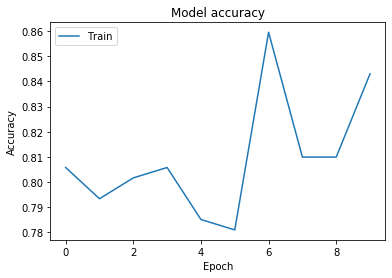

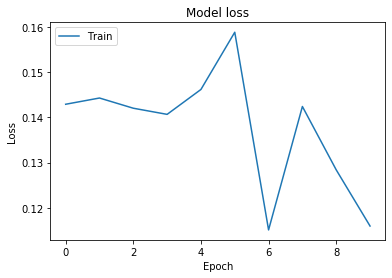

In [37]:
model15=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model15.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model15.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 85us/sample - loss: 0.1970 - acc: 0.7438
Epoch 2/10
242/242 [==============================] - 0s 97us/sample - loss: 0.1146 - acc: 0.8430
Epoch 3/10
242/242 [==============================] - 0s 87us/sample - loss: 0.1470 - acc: 0.8017
Epoch 4/10
242/242 [==============================] - 0s 83us/sample - loss: 0.1233 - acc: 0.8388
Epoch 5/10
242/242 [==============================] - 0s 242us/sample - loss: 0.1292 - acc: 0.8347
Epoch 6/10
242/242 [==============================] - 0s 136us/sample - loss: 0.1983 - acc: 0.7686
Epoch 7/10
242/242 [==============================] - 0s 124us/sample - loss: 0.1138 - acc: 0.8595
Epoch 8/10
242/242 [==============================] - 0s 128us/sample - loss: 0.1305 - acc: 0.8306
Epoch 9/10
242/242 [==============================] - 0s 176us/sample - loss: 0.1298 - acc: 0.8182
Epoch 10/10
242/242 [==============================] - 0s 113us/sample - loss: 0.1193 - acc: 0.8306


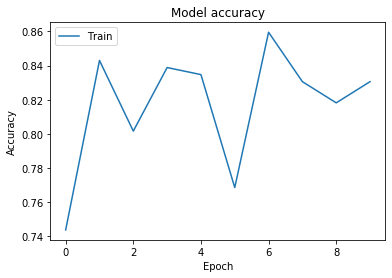

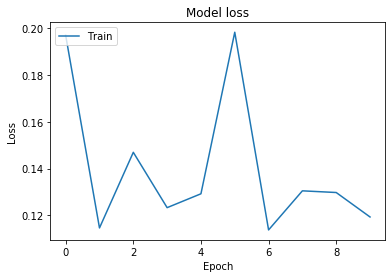

In [38]:
model16=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model16.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model16.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 87us/sample - loss: 0.1677 - acc: 0.7686
Epoch 2/10
242/242 [==============================] - 0s 86us/sample - loss: 0.1178 - acc: 0.8306
Epoch 3/10
242/242 [==============================] - 0s 115us/sample - loss: 0.1095 - acc: 0.8595
Epoch 4/10
242/242 [==============================] - 0s 112us/sample - loss: 0.1389 - acc: 0.8223
Epoch 5/10
242/242 [==============================] - 0s 95us/sample - loss: 0.1162 - acc: 0.8223
Epoch 6/10
242/242 [==============================] - 0s 99us/sample - loss: 0.1524 - acc: 0.8140
Epoch 7/10
242/242 [==============================] - 0s 120us/sample - loss: 0.1161 - acc: 0.8264
Epoch 8/10
242/242 [==============================] - 0s 90us/sample - loss: 0.1097 - acc: 0.8471
Epoch 9/10
242/242 [==============================] - 0s 126us/sample - loss: 0.1670 - acc: 0.7934
Epoch 10/10
242/242 [==============================] - 0s 111us/sample - loss: 0.1312 - acc: 0.8182


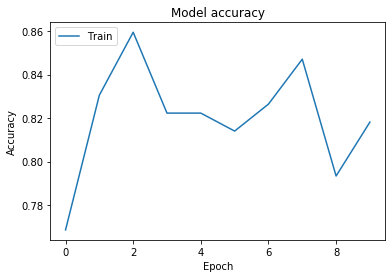

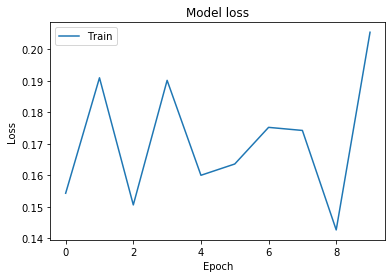

In [39]:
model17=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model17.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model10.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/10
242/242 [==============================] - 0s 144us/sample - loss: 0.1256 - acc: 0.8512
Epoch 2/10
242/242 [==============================] - 0s 102us/sample - loss: 0.1060 - acc: 0.8430
Epoch 3/10
242/242 [==============================] - 0s 93us/sample - loss: 0.1552 - acc: 0.7810
Epoch 4/10
242/242 [==============================] - 0s 129us/sample - loss: 0.1530 - acc: 0.7645
Epoch 5/10
242/242 [==============================] - 0s 99us/sample - loss: 0.1368 - acc: 0.8017
Epoch 6/10
242/242 [==============================] - 0s 134us/sample - loss: 0.1134 - acc: 0.8306
Epoch 7/10
242/242 [==============================] - 0s 119us/sample - loss: 0.1570 - acc: 0.7975
Epoch 8/10
242/242 [==============================] - 0s 100us/sample - loss: 0.1238 - acc: 0.8264
Epoch 9/10
242/242 [==============================] - 0s 81us/sample - loss: 0.1420 - acc: 0.8264
Epoch 10/10
242/242 [==============================] - 0s 81us/sample - loss: 0.1102 - acc: 0.8512


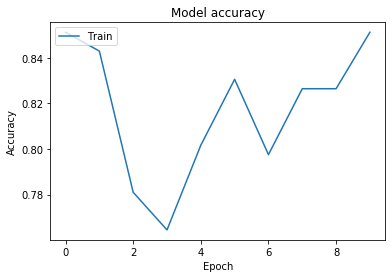

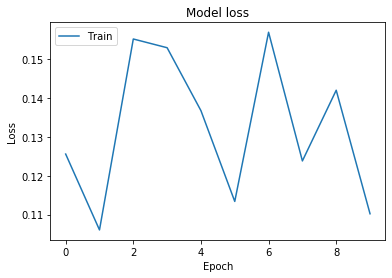

In [40]:
model18=model.fit(X_train_all,y_train_all,epochs=10,batch_size=50)
plt.plot(model18.history['acc'])
#plt.plot(model1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model18.history['loss'])
#plt.plot(model1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
model.evaluate(x=X_test_all,y=y_test_all)

61/61 [==============================] - 0s 771us/sample - loss: 0.1711 - acc: 0.7541


[0.17106134383404842, 0.75409836]

In [42]:
X_test_all


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
172,58,1,1,120,284,0,0,160,0,1.8,1,0,2
134,41,0,1,126,306,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3


In [43]:
print(model.predict(x=X_test_all),y_test_all,sep=',')

[[0.5755263 ]
 [0.93506545]
 [0.8888735 ]
 [0.7438769 ]
 [0.09262396]
 [0.8069281 ]
 [0.06148775]
 [0.5042004 ]
 [0.79468167]
 [0.06148775]
 [0.09052081]
 [0.92364794]
 [0.7998761 ]
 [0.06148775]
 [0.51051223]
 [0.8209416 ]
 [0.7398019 ]
 [0.89003485]
 [0.06148775]
 [0.09581362]
 [0.4236346 ]
 [0.76153404]
 [0.93336207]
 [0.6217565 ]
 [0.82926446]
 [0.4897863 ]
 [0.72557247]
 [0.77114546]
 [0.65528035]
 [0.06148775]
 [0.06148775]
 [0.80917615]
 [0.88162774]
 [0.74902266]
 [0.9517334 ]
 [0.6510909 ]
 [0.10347614]
 [0.7260753 ]
 [0.83329135]
 [0.74333256]
 [0.8502308 ]
 [0.09989234]
 [0.85293406]
 [0.80824846]
 [0.7177731 ]
 [0.5913083 ]
 [0.06148775]
 [0.718057  ]
 [0.06148775]
 [0.08377314]
 [0.0971972 ]
 [0.06148775]
 [0.41915783]
 [0.07410814]
 [0.2979589 ]
 [0.7413188 ]
 [0.8568513 ]
 [0.9548996 ]
 [0.7257206 ]
 [0.06148775]
 [1.0225781 ]],71     1
162    1
44     1
189    0
190    0
47     1
301    0
172    0
134    1
300    0
42     1
136    1
7      1
187    0
43     1
200    0
7

In [44]:
y_test_all

71     1
162    1
44     1
189    0
190    0
47     1
301    0
172    0
134    1
300    0
42     1
136    1
7      1
187    0
43     1
200    0
77     1
16     1
166    0
208    0
129    1
94     1
148    1
130    1
293    0
119    1
153    1
19     1
61     1
257    0
      ..
259    0
36     1
27     1
32     1
60     1
97     1
146    1
83     1
45     1
145    1
186    0
302    0
254    0
132    1
281    0
297    0
29     1
198    0
280    0
236    0
180    0
89     1
8      1
199    0
222    0
30     1
115    1
81     1
269    0
147    1
Name: target, Length: 61, dtype: int64

In [45]:
model

In [46]:
model.save('my_model11.h5')

In [49]:
new_model = keras.models.load_model('my_model11.h5')

SyntaxError: invalid syntax (<ipython-input-49-9fa5c6eb9ae5>, line 1)

In [50]:
new_model.predict(x=X_test_all)

NameError: name 'new_model' is not defined